<a href="https://colab.research.google.com/github/Minakshi654/Modelname/blob/main/CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import warnings
import numpy as np

In [7]:
data2023 = pd.read_csv("/content/CPU_Utilization_2023_Data.csv")

In [8]:
data2024 = pd.read_csv("/content/CPU_Utilization_2024_Data.csv")

In [9]:
df_merged = pd.concat([data2023, data2024], ignore_index=True)

In [10]:
df_merged.shape

(973813, 3)

In [11]:
df_merged.describe()

,[xBackground__],[xInteractive__]
count,973813.000000,973813.000000
mean,0.109621,0.094052
std,0.053882,0.138902
min,0.000000,0.000000
25%,0.077682,0.002500
50%,0.095789,0.033041
75%,0.123733,0.134577
max,0.680833,1.702700


In [12]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973813 entries, 0 to 973812
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TimePoints[TimePoint]  973813 non-null  object 
 1   [xBackground__]        973813 non-null  float64
 2   [xInteractive__]       973813 non-null  float64
dtypes: float64(2), object(1)
memory usage: 22.3+ MB


In [13]:
df_merged [' total'] = df_merged ['[xBackground__]'] + df_merged ['[xInteractive__]']

In [14]:
df_merged.head()

,TimePoints[TimePoint],[xBackground__],[xInteractive__],total
0,14/04/2023 00:00:00,0.000138,0.0,0.000138
1,14/04/2023 00:00:30,0.000138,0.0,0.000138
2,14/04/2023 00:01:00,0.000138,0.0,0.000138
3,14/04/2023 00:01:30,0.000138,0.0,0.000138
4,14/04/2023 00:02:00,0.000138,0.0,0.000138


In [21]:
import pandas as pd

# Assuming your original DataFrame is named "df_merged"
# Convert the "TimePoints[TimePoint]" column to datetime
df_merged['TimePoints[TimePoint]'] = pd.to_datetime(df_merged['TimePoints[TimePoint]'], format='%d/%m/%Y %H:%M:%S')

# Group by 10-minute intervals and calculate the maximum "total" value
grouped = df_merged.groupby(pd.Grouper(key='TimePoints[TimePoint]', freq='10Min'))[' total'].max()

# Create a new DataFrame with the grouped intervals and maximum values
result_df = pd.DataFrame({
    'Interval Start': grouped.index,
    'Max Total': grouped.values
})

# Save the result to a CSV file
result_df.to_csv('grouped_intervals.csv', index=False)

# Print the first few rows of the result DataFrame
print(result_df.head())


       Interval Start  Max Total
0 2023-04-14 00:00:00   0.000138
1 2023-04-14 00:10:00   0.000138
2 2023-04-14 00:20:00   0.051037
3 2023-04-14 00:30:00   0.042937
4 2023-04-14 00:40:00   0.031671


In [22]:
grouped_intervals = pd.read_csv("/content/grouped_intervals.csv")

In [23]:
grouped_intervals.head()

,Interval Start,Max Total
0,2023-04-14 00:00:00,0.000138
1,2023-04-14 00:10:00,0.000138
2,2023-04-14 00:20:00,0.051037
3,2023-04-14 00:30:00,0.042937
4,2023-04-14 00:40:00,0.031671


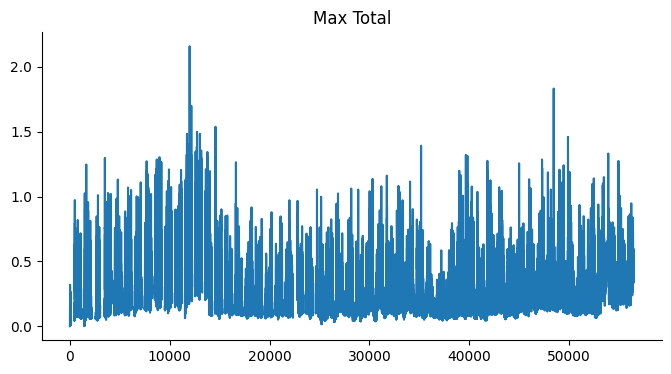

In [27]:
# @title Max Total

from matplotlib import pyplot as plt
grouped_intervals['Max Total'].plot(kind='line', figsize=(8, 4), title='Max Total')
plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
grouped_intervals.shape

(56448, 2)

In [25]:
result_df['Status'] = result_df['Max Total'].apply(lambda x: 'Overflow' if x >= 1 else 'Normal')

# Print the updated DataFrame
print(result_df.head())

       Interval Start  Max Total  Status
0 2023-04-14 00:00:00   0.000138  Normal
1 2023-04-14 00:10:00   0.000138  Normal
2 2023-04-14 00:20:00   0.051037  Normal
3 2023-04-14 00:30:00   0.042937  Normal
4 2023-04-14 00:40:00   0.031671  Normal


In [26]:
result_df.to_csv('grouped_intervals_with_status.csv', index=False)

In [28]:
num_overflows = (result_df['Max Total'] >= 1).sum()
print(f"Total number of overflows: {num_overflows}")

Total number of overflows: 593


In [29]:
# Create a new DataFrame with overflow rows
overflow_df = result_df[result_df['Max Total'] >= 1]

# Save the overflow rows to a CSV file
overflow_df.to_csv('overflow_intervals.csv', index=False)

print("Overflow rows saved to 'overflow_intervals.csv'")

Overflow rows saved to 'overflow_intervals.csv'


In [2]:
overflow_intervals = pd.read_csv("/content/overflow_intervals.csv")

In [3]:
overflow_intervals.head()

,Interval Start,Max Total,Status
0,2023-04-24 08:00:00,1.025500,Overflow
1,2023-04-25 09:10:00,1.247104,Overflow
2,2023-05-03 12:30:00,1.011079,Overflow
3,2023-05-08 07:30:00,1.298292,Overflow
4,2023-05-08 07:40:00,1.170842,Overflow


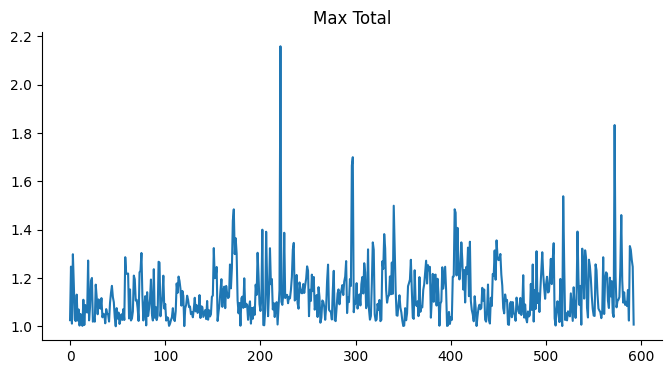

In [32]:
# @title Max Total

from matplotlib import pyplot as plt
overflow_intervals['Max Total'].plot(kind='line', figsize=(8, 4), title='Max Total')
plt.gca().spines[['top', 'right']].set_visible(False)

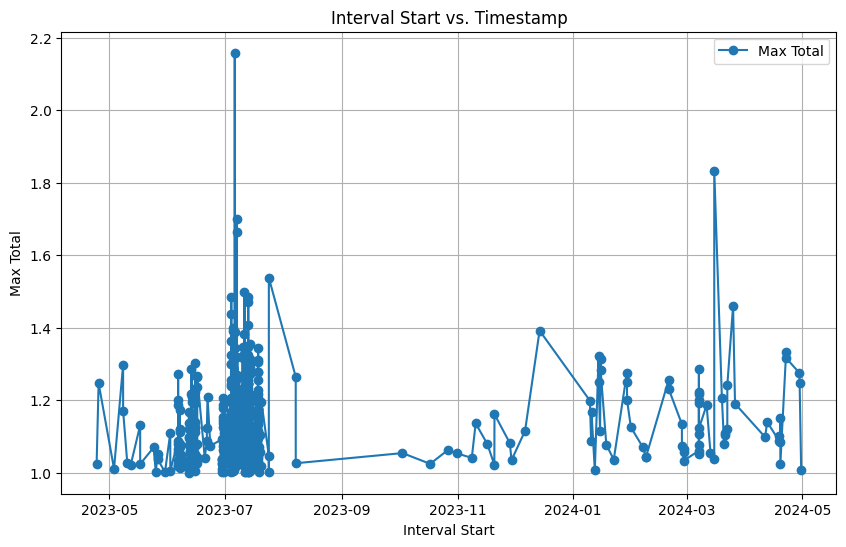

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the "result_df" DataFrame from the previous steps
# Convert the "TimePoints[TimePoint]" column to datetime
overflow_intervals['Interval Start'] = pd.to_datetime(overflow_intervals['Interval Start'], format='%Y-%m-%d %H:%M:%S')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(overflow_intervals['Interval Start'], overflow_intervals['Max Total'], marker='o', label='Max Total')
plt.xlabel('Interval Start')
plt.ylabel('Max Total')
plt.title('Interval Start vs. Timestamp')
plt.grid(True)
plt.legend()
plt.show()


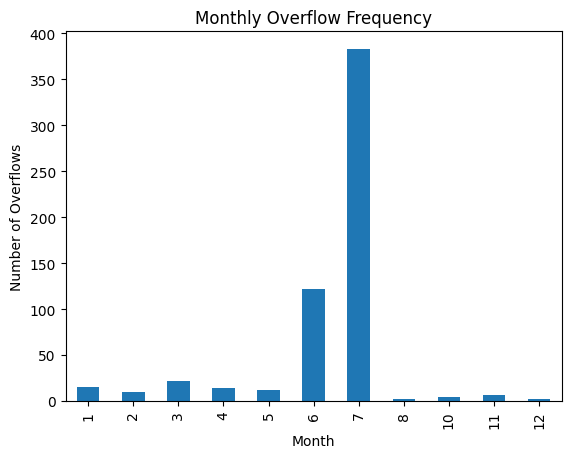

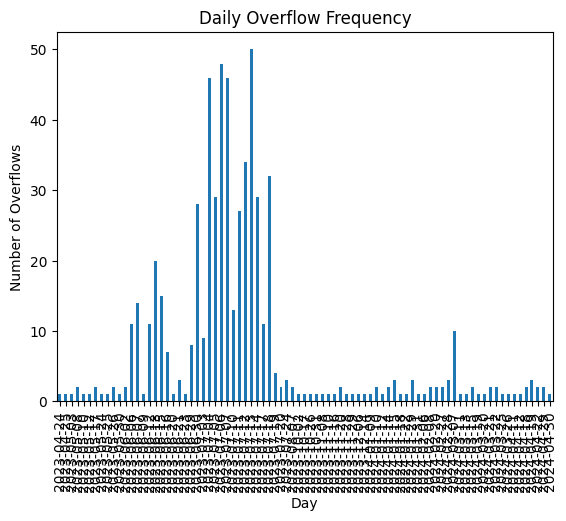

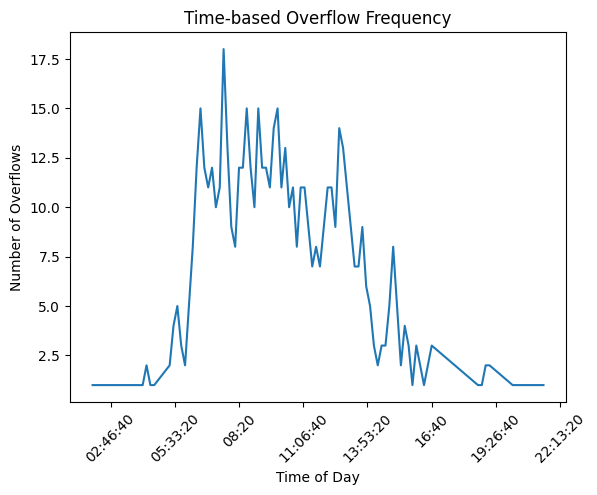

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('overflow_intervals.csv')

# Convert 'Interval Start' column to datetime objects
df['Interval Start'] = pd.to_datetime(df['Interval Start'])

# Extract day and time components
df['Month'] = df['Interval Start'].dt.month
df['Day'] = df['Interval Start'].dt.date
df['Time'] = df['Interval Start'].dt.time

# Group by day and time
Monthly_overflows = df.groupby(['Month']).size()
daily_overflows = df.groupby('Day').size()
time_overflows = df.groupby('Time').size()

# Plot daily overflows
Monthly_overflows.plot(kind='bar')
plt.title('Monthly Overflow Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Overflows')
plt.show()

# Plot daily overflows
daily_overflows.plot(kind='bar')
plt.title('Daily Overflow Frequency')
plt.xlabel('Day')
plt.ylabel('Number of Overflows')
plt.show()

# Plot time-based overflows
time_overflows.plot(kind='line')
plt.title('Time-based Overflow Frequency')
plt.xlabel('Time of Day')
plt.ylabel('Number of Overflows')
plt.xticks(rotation=45)
plt.show()


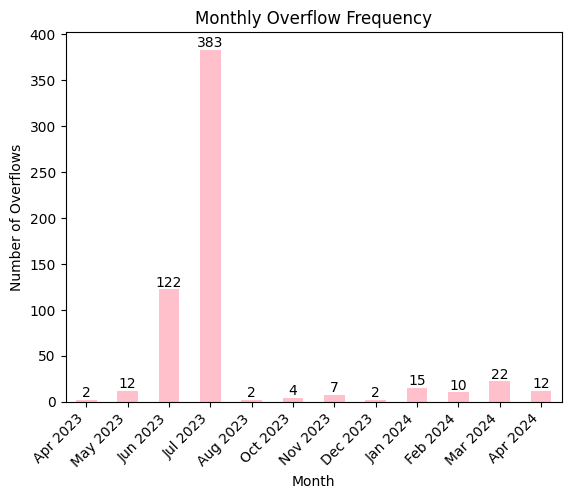

   Month Label  Number of Overflows
0     Apr 2023                    2
1     May 2023                   12
2     Jun 2023                  122
3     Jul 2023                  383
4     Aug 2023                    2
5     Oct 2023                    4
6     Nov 2023                    7
7     Dec 2023                    2
8     Jan 2024                   15
9     Feb 2024                   10
10    Mar 2024                   22
11    Apr 2024                   12


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the dataset (replace 'overflow_intervals.csv' with your actual data file)
df = pd.read_csv('overflow_intervals.csv')

# Convert 'Interval Start' column to datetime objects
df['Interval Start'] = pd.to_datetime(df['Interval Start'])

# Extract year and month components
df['Year'] = df['Interval Start'].dt.year
df['Month'] = df['Interval Start'].dt.month

# Exclude June (month number 6) and July (month number 7)
df_filtered = df[~df['Month'].isin([ ])]

# Keep only April 2023 (month number 4, year 2023) and exclude April 2024 (month number 4, year 2024)
df_filtered = df_filtered[(df_filtered['Month'] != 0) | (df_filtered['Year'] != 2024)]

# Group by year and month
Monthly_overflows = df_filtered.groupby(['Year', 'Month']).size()

# Create month labels
month_labels = [calendar.month_abbr[m] + ' ' + str(y) for y, m in Monthly_overflows.index]

# Plot monthly overflows
Monthly_overflows.plot(kind='bar', color='Pink')
plt.title('Monthly Overflow Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Overflows')
plt.xticks(range(len(month_labels)), month_labels, rotation=45, ha='right')

# Add value labels above each bar
for i, v in enumerate(Monthly_overflows):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

summary_df = pd.DataFrame(Monthly_overflows, columns=['Number of Overflows'])

# Reset index to make 'Year' and 'Month' separate columns
summary_df.reset_index(inplace=True)

# Add month labels
summary_df['Month Label'] = summary_df.apply(lambda row: calendar.month_abbr[row['Month']] + ' ' + str(row['Year']), axis=1)

# Display the summary
print(summary_df[['Month Label', 'Number of Overflows']])



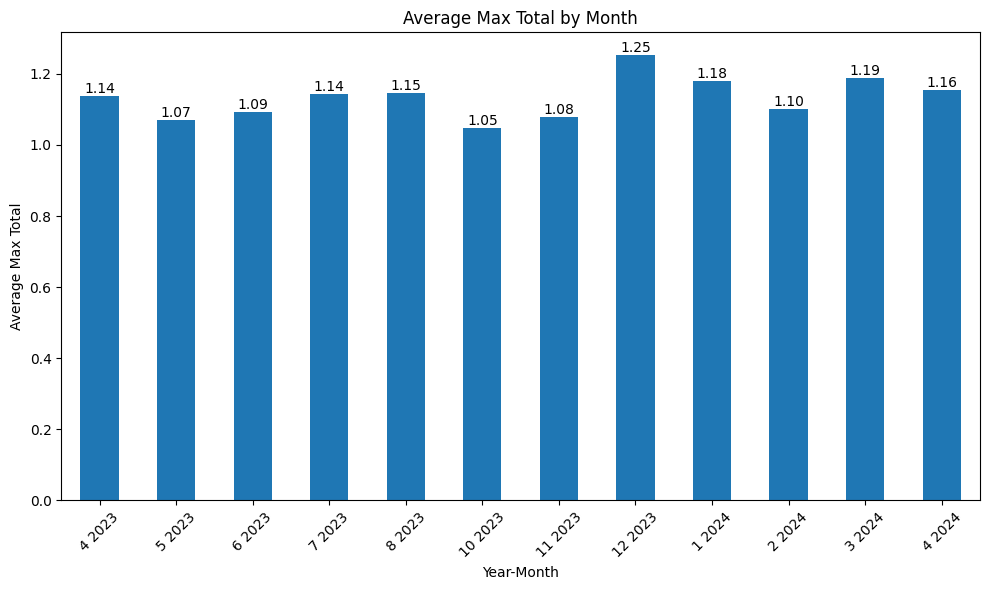

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the "overflow_columns" DataFrame
# Replace the following line with your actual data
df = pd.read_csv("/content/overflow_intervals.csv")

# Convert 'Interval Start' column to datetime
df['Interval Start'] = pd.to_datetime(df['Interval Start'])

# Group by year and month, calculate average Max Total
average_max_total = df.groupby([df['Interval Start'].dt.year, df['Interval Start'].dt.month])['Max Total'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_max_total.plot(kind='bar', xlabel='Year-Month', ylabel='Average Max Total', title='Average Max Total by Month')

# Add labels to the bars
for i, value in enumerate(average_max_total):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Customize x-axis labels
plt.xticks(range(len(average_max_total)), [f'{month} {year}' for year, month in average_max_total.index], rotation=45)

plt.tight_layout()
plt.show()


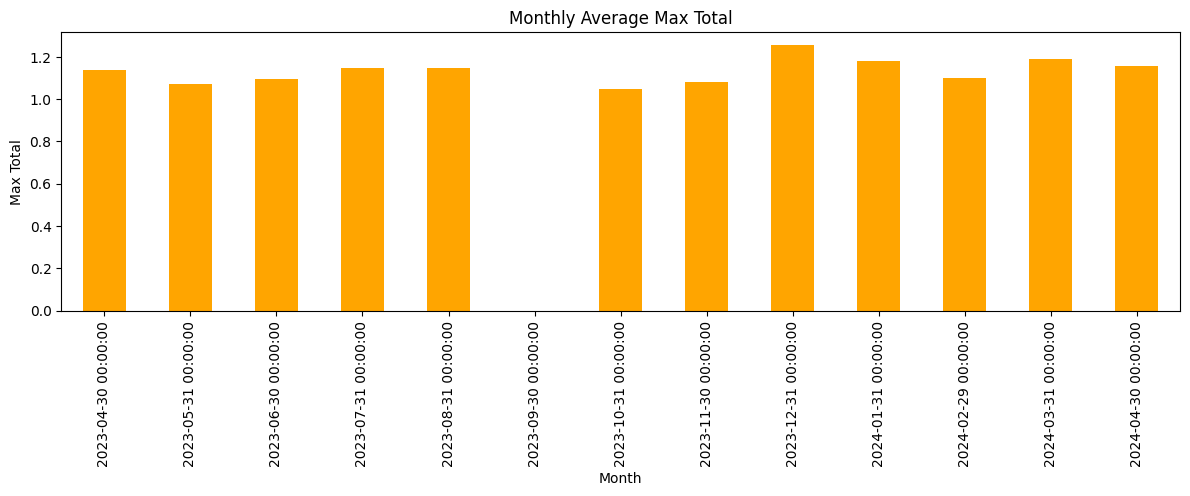

In [42]:
monthly_overload_average = Monthly_overflows.mean()

monthly_average_max_total = df_filtered.resample('M', on='Interval Start')['Max Total'].mean()

# Plotting
plt.figure(figsize=(12, 8))

# Monthly Average Max Total
plt.subplot(2, 1, 2)
monthly_average_max_total.plot(kind='bar', color='orange')
plt.title('Monthly Average Max Total')
plt.xlabel('Month')
plt.ylabel('Max Total')

plt.tight_layout()
plt.show()


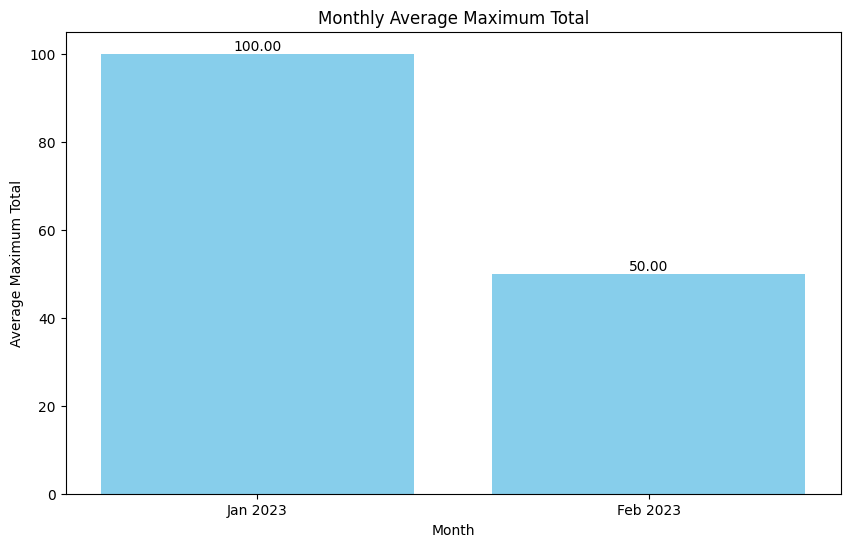

          Month  Average Max Total
Month                             
1      Jan 2023              100.0
2      Feb 2023               50.0


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load your dataset (replace 'overflow_intervals.csv' with your actual data file)
df = pd.read_csv('overflow_intervals.csv')

df['Interval Start'] = pd.to_datetime(df['Interval Start'])

# Extract year and month components
df['Year'] = df['Interval Start'].dt.year
df['Month'] = df['Interval Start'].dt.month

# Exclude June (month number 6) and July (month number 7)
df_filtered = df[~df['Month'].isin([6, 7])]

# Calculate the maximum total for each month
monthly_max_total = df_filtered.groupby(['Year', 'Month'])['Total'].max()

# Calculate the average of maximum totals
monthly_avg_max_total = monthly_max_total.groupby('Month').mean()

# Create month labels with year
month_labels = [calendar.month_abbr[m] + ' 2023' for m in monthly_avg_max_total.index]

# Plot monthly average maximum total
plt.figure(figsize=(10, 6))
plt.bar(month_labels, monthly_avg_max_total, color='skyblue')
plt.title('Monthly Average Maximum Total')
plt.xlabel('Month')
plt.ylabel('Average Maximum Total')

# Add value labels above each bar
for i, v in enumerate(monthly_avg_max_total):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Display the summary data
summary_df = pd.DataFrame({
    'Month': month_labels,
    'Average Max Total': monthly_avg_max_total
})
print(summary_df)
